# Pràctica 2: La regressió

## Objectius

Els objectius d'aquesta pràctica són:
* Aplicar models de regressió, ficant l'èmfasi en:
 * Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
 * Avaluar correctament l'error del model 
 * Visualitzar les dades i el model resultant
 * Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Generalment, per tal de que veigueu varietat de dades i problematiques, es treballarà sobre dues bases de dades cada setmana. La primera serà comuna per tothom i, en aquest cas, tindrá la temática del COVID. La segona, tot i ser de lliure elecció (us deixem que l'escolliu vosaltres mateixos), haurà de tenir uns mínims de dificultat (o almenys, que tinguin una mica de gràcia). 


#### COVID data

Durant el primer mes, treballarem amb una base de dades comuna, amb la temática del COVID-19. Podeu trobar la darrera actualització a [OWID DATA](https://github.com/owid/covid-19-data/tree/master/public/data), tot i que no farem servir cap dada a partir del 1 de Octubre de 2020, per això us recomanem de fer servir la que tenim penjada al Campus Virtual.

#### Dataset lliure elecció
Podeu trobar datasets de dades a qualsevol d'aquestes dues webs:
* https://www.kaggle.com/datasets?search=machine+learning
* https://archive.ics.uci.edu/ml/datasets.php

L'objectiu será escollir un dataset adequat per la tasca que volem realitzar. LLavors, el primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.


### Pràctica 2: Regressió Lineal i Polinomial
En aquesta pràctica es presenten diversos problemes per comprendre els mètodes de regressió numèrica. Cada apartat pot tenir una qualificació diferent.

* A. Exploració de la base de dades (30%)
* B. Ús de regressor Lineal (30%)
* C. Demostració d'assoliment (A+B en una nova BBDD) (20%)
* D. Implementació Regressor Lineal (20%)
* (Extra) Implementació Regresor polinomial (+10%, max: 10pts)



A continuació us posem un esquelet de codi que podeu tenir com a referència (o no)

In [1]:
# Codi esquelet per la pràctica de la 2 sessió: Regressió Lineal i Polinomial

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('owid-covid-data.csv')

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (119911, 65)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [2]:
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.000,5.000,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119906,ZWE,Africa,Zimbabwe,2021-09-24,129134.000,0.000,214.571,4600.000,0.000,5.429,8556.357,0.000,14.217,304.794,0.000,0.360,1.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.440,20.020,14.420,NaN,2073.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
119907,ZWE,Africa,Zimbabwe,2021-09-25,129505.000,371.000,252.286,4603.000,3.000,5.714,8580.939,24.582,16.716,304.993,0.199,0.379,1.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.580,20.080,14.500,NaN,2141.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
119908,ZWE,Africa,Zimbabwe,2021-09-26,129625.000,120.000,241.000,4604.000,1.000,5.286,8588.890,7.951,15.969,305.059,0.066,0.350,1.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.690,20.120,14.570,NaN,2081.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN
119909,ZWE,Africa,Zimbabwe,2021-09-27,129919.000,294.000,247.571,4607.000,3.000,5.429,8608.371,19.480,16.404,305.258,0.199,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.880,20.220,14.660,NaN,2073.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN


In [3]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,113903.000,113900.000,112885.000,103151.000,103306.000,112885.000,113303.000,113300.000,112290.000,102564.000,102719.000,112290.000,96654.000,13539.000,13539.000,15556.000,15556.000,1237.000,1237.000,2178.000,2178.000,51679.000,51613.000,51613.000,51679.000,...,27079.000,25929.000,22878.000,2867.000,48402.000,100191.000,119097.000,110870.000,105900.000,104722.000,105319.000,106515.000,71480.000,106185.000,109475.000,82910.000,81706.000,53351.000,96551.000,113754.000,106278.000,4129.000,4129.000,4275.000,4129.000
mean,1411010.520,6453.691,6475.774,35908.229,145.576,132.612,17428.460,82.855,82.932,365.862,1.562,1.416,1.006,946.747,22.333,4270.229,149.469,214.712,16.613,3042.328,89.130,54458.179,10496214.964,440.190,2.418,...,43.059,25.867,19.410,1.515,3487.525,57.035,122667968.219,395.505,30.522,8.762,5.545,19249.208,13.480,259.244,8.013,10.593,32.737,50.744,3.024,73.258,0.727,28797.992,8.190,15.037,701.843
std,9456979.846,39375.943,38985.751,214030.836,793.735,742.532,29833.431,193.088,163.441,622.368,4.124,3.050,0.347,2918.471,25.333,11866.831,197.003,499.026,31.385,10412.309,186.954,191559.845,44263614.425,1073.431,6.509,...,44.846,24.232,21.353,4.646,4358.805,20.718,677210974.588,1842.468,9.124,6.192,4.223,20051.037,19.983,119.318,4.275,10.505,13.504,31.753,2.453,7.541,0.150,83446.267,16.123,31.190,1097.895
min,1.000,-74347.000,-6223.000,1.000,-1918.000,-232.143,0.001,-3125.829,-272.971,0.001,-75.911,-10.844,-0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,47.000,0.137,15.100,1.144,0.526,661.240,0.100,79.370,0.990,0.100,7.700,1.188,0.100,53.280,0.394,-31959.400,-27.350,-95.920,-1728.844
25%,1941.000,3.000,9.143,67.000,0.000,0.000,337.046,0.278,1.530,10.104,0.000,0.000,0.840,25.000,3.367,106.000,20.477,5.091,1.431,39.005,8.273,2029.000,228335.000,19.508,0.177,...,4.980,3.760,2.220,0.000,501.000,42.825,2078723.000,36.253,22.200,3.466,2.063,4449.898,0.600,168.711,5.310,1.900,21.600,19.351,1.300,67.920,0.602,-292.600,-1.600,-1.555,-65.793
50%,19989.000,91.000,113.571,593.000,2.000,1.571,2635.769,10.527,14.453,67.155,0.151,0.189,1.010,122.000,12.387,508.500,67.891,26.014,5.640,243.343,32.225,7330.000,1145366.000,98.603,0.717,...,25.690,17.900,10.340,0.010,2179.000,58.330,9634162.000,83.479,29.700,6.378,3.871,12895.635,2.200,243.811,7.110,6.300,31.400,49.839,2.400,74.620,0.744,1279.200,4.520,5.640,271.653
75%,208247.000,918.000,969.571,5055.500,19.000,15.571,20850.372,80.676,90.143,440.626,1.367,1.347,1.180,551.000,34.465,2285.250,203.218,141.262,18.018,1217.773,101.390,28084.500,4697021.000,403.339,2.204,...,72.040,44.660,31.697,0.290,5143.750,72.690,33933611.000,209.588,39.100,14.178,8.678,27216.445,21.200,329.942,10.080,19.300,41.100,82.502,3.861,78.740,0.848,17379.800,13.170,21.185,1194.686
max,232783704.000,906034.000,826428.571,4765112.000,17976.000,14723.000,216095.440,8620.690,3385

In [4]:
covid_spain = dataset[dataset.location=="Spain"]
covid_italy = dataset[dataset.location=="Italy"]
covid_spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
101423,ESP,Europe,Spain,2020-02-01,1.000,1.000,NaN,NaN,NaN,NaN,0.021,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
101424,ESP,Europe,Spain,2020-02-02,1.000,0.000,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.963,0.063,17.777,0.380,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,-3085.800,-6.050,-0.900,-66.013
101425,ESP,Europe,Spain,2020-02-03,1.000,0.000,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
101426,ESP,Europe,Spain,2020-02-04,1.000,0.000,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
101427,ESP,Europe,Spain,2020-02-05,1.000,0.000,NaN,NaN,NaN,NaN,0.021,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.110,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102024,ESP,Europe,Spain,2021-09-24,4946601.000,2746.000,2436.429,86229.000,44.000,63.714,105820.487,58.744,52.121,1844.660,0.941,1.363,0.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1765.000,42.130,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
102025,ESP,Europe,Spain,2021-09-25,4946601.000,0.000,2436.429,86229.000,0.000,63.714,105820.487,0.000,52.121,1844.660,0.000,1.363,0.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1556.000,42.130,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
102026,ESP,Europe,Spain,2021-09-26,4946601.000,0.000,2436.429,86229.000,0.000,63.714,105820.487,0.000,52.121,1844.660,0.000,1.363,0.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149.460,80.460,77.970,NaN,1346.000,42.130,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560,0.904,NaN,NaN,NaN,NaN
102027,ESP,Europe,Spain,2021-09-27,4951640.000,5039.000,2300.857,86298.000,69.000,56.714,105928.284,107.797,49.221,1846.136,1.476,1.213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149.610,80.500,78.090,NaN,1558.000,NaN,46745211.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,NaN,2.970,83.560

In [5]:
dataset["datetime"] = pd.to_datetime(dataset["date"], format='%Y-%m-%d', errors='ignore')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,datetime
0,AFG,Asia,Afghanistan,2020-02-24,5.000,5.000,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-24
1,AFG,Asia,Afghanistan,2020-02-25,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-25
2,AFG,Asia,Afghanistan,2020-02-26,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-26
3,AFG,Asia,Afghanistan,2020-02-27,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-27
4,AFG,Asia,Afghanistan,2020-02-28,5.000,0.000,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.330,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119906,ZWE,Africa,Zimbabwe,2021-09-24,129134.000,0.000,214.571,4600.000,0.000,5.429,8556.357,0.000,14.217,304.794,0.000,0.360,1.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.020,14.420,NaN,2073.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN,2021-09-24
119907,ZWE,Africa,Zimbabwe,2021-09-25,129505.000,371.000,252.286,4603.000,3.000,5.714,8580.939,24.582,16.716,304.993,0.199,0.379,1.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.080,14.500,NaN,2141.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN,2021-09-25
119908,ZWE,Africa,Zimbabwe,2021-09-26,129625.000,120.000,241.000,4604.000,1.000,5.286,8588.890,7.951,15.969,305.059,0.066,0.350,1.140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.120,14.570,NaN,2081.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN,2021-09-26
119909,ZWE,Africa,Zimbabwe,2021-09-27,129919.000,294.000,247.571,4607.000,3.000,5.429,8608.371,19.480,16.404,305.258,0.199,0.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.220,14.660,NaN,2073.000,NaN,15092171.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.571,NaN,NaN,NaN,NaN,2021-09-27


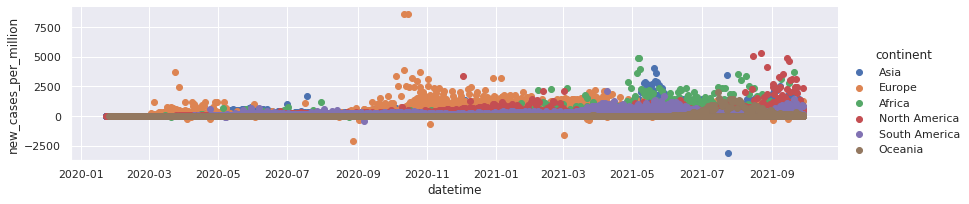

In [6]:
fg = sns.FacetGrid(data=dataset, hue='continent',aspect=4)
fg.map(plt.scatter, 'datetime', 'new_cases_per_million').add_legend()

Quina correlació entre aquests atributs hi veieu?


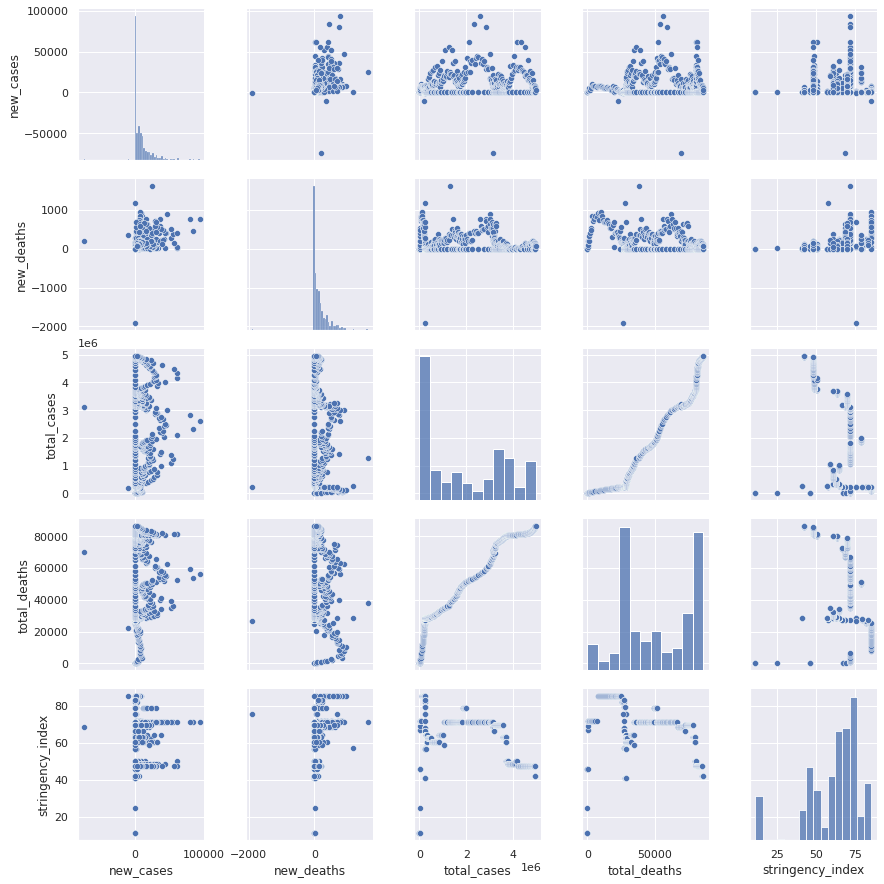

In [7]:
print("Quina correlació entre aquests atributs hi veieu?")

selected_columns = ["location", "new_cases", "new_deaths", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

Què passa si utilitzem les dades smoothed?


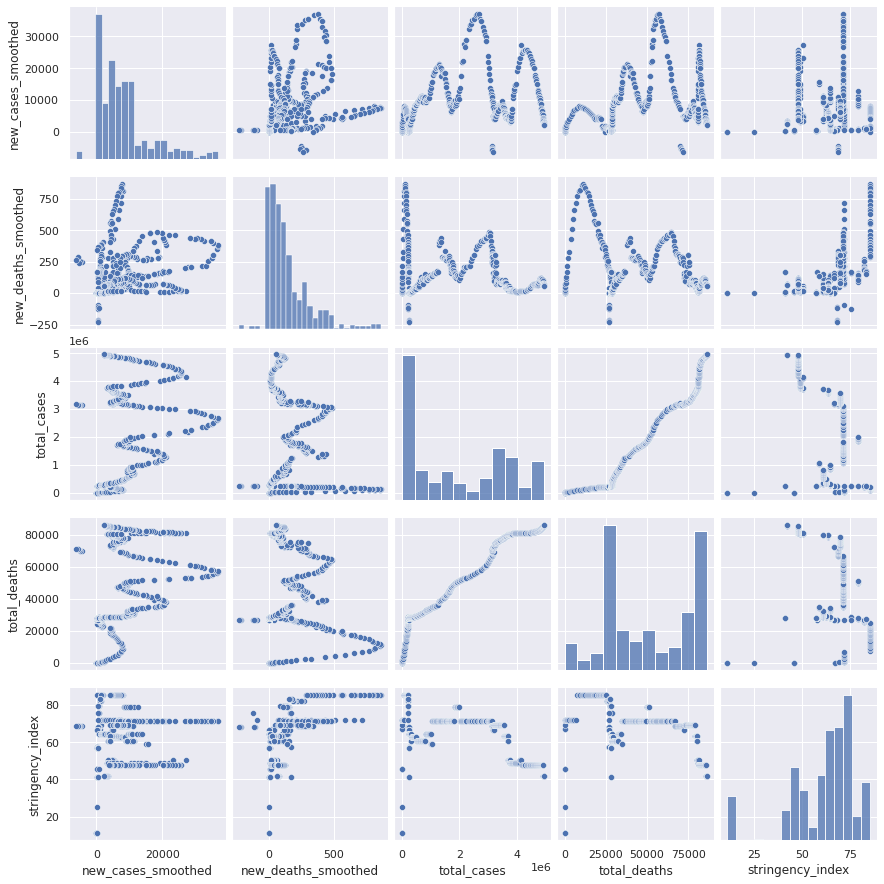

In [8]:
print("Què passa si utilitzem les dades smoothed?")

selected_columns = ["location", "new_cases_smoothed", "new_deaths_smoothed", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

In [9]:
print("I si busquem alguna correlació entre paisos per un dia concret?")

covid_agost = dataset[dataset.date=="2020-08-01"]
covid_agost

I si busquem alguna correlació entre paisos per un dia concret?


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,datetime
159,AFG,Asia,Afghanistan,2020-08-01,36796.000,168.000,96.286,1287.000,12.000,5.286,923.700,4.217,2.417,32.308,0.301,0.133,0.780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.700,39835428.000,54.422,18.600,2.581,1.337,1803.987,NaN,597.029,9.590,NaN,NaN,37.746,0.500,64.830,0.511,NaN,NaN,NaN,NaN,2020-08-01
753,OWID_AFR,NaN,Africa,2020-08-01,944997.000,16922.000,16605.714,19974.000,294.000,350.429,688.028,12.320,12.090,14.543,0.214,0.255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1373486472.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-01
1335,ALB,Europe,Albania,2020-08-01,5396.000,120.000,108.429,161.000,4.000,3.857,1878.219,41.769,37.741,56.040,1.392,1.343,1.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,62.960,2872934.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,NaN,2.890,78.570,0.795,NaN,NaN,NaN,NaN,2020-08-01
1917,DZA,Africa,Algeria,2020-08-01,30950.000,556.000,598.000,1223.000,13.000,11.000,693.688,12.462,13.403,27.411,0.291,0.247,0.960,64.000,1.434,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.630,44616626.000,17.348,29.100,6.211,3.857,13913.839,0.500,278.364,6.730,0.700,30.400,83.741,1.900,76.880,0.748,NaN,NaN,NaN,NaN,2020-08-01
2493,AND,Europe,Andorra,2020-08-01,925.000,0.000,4.000,52.000,0.000,0.000,11958.011,0.000,51.710,672.234,0.000,0.000,1.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,41.670,77354.000,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.970,29.000,37.800,NaN,NaN,83.730,0.868,NaN,NaN,NaN,NaN,2020-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117026,VNM,Asia,Vietnam,2020-08-01,590.000,32.000,24.714,3.000,0.000,0.429,6.010,0.326,0.252,0.031,0.000,0.004,1.740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.630,98168829.000,308.127,32.600,7.150,4.718,6171.884,2.000,245.465,6.000,1.000,45.900,85.847,2.600,75.400,0.704,NaN,NaN,NaN,NaN,2020-08-01
117832,OWID_WRL,NaN,World,2020-08-01,17854860.000,250669.000,257277.714,718270.000,6125.000,6089.857,2267.294,31.831,32.670,91.209,0.778,0.773,1.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7874965732.000,58.045,30.900,8.696,5.355,15469.207,10.000,233.070,8.510,6.434,34.635,60.130,2.705,72.580,0.737,NaN,NaN,NaN,NaN,2020-08-01
118369,YEM,Asia,Yemen,2020-08-01,1730.000,2.000,8.000,494.000,1.000,2.857,56.739,0.066,0.262,16.202,0.033,0.094,0.870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.480,30490639.000,53.508,20.300,2.922,1.583,1479.147,18.800,495.003,5.350,7.600,29.200,49.542,0.700,66.120,0.470,NaN,NaN,NaN,NaN,2020-08-01
118929,ZMB,Africa,Zambia,2020-08-01,6228.000,265.000,271.429,165.000,14.000,3.714,329.164,14.006,14.346,8.721,0.740,0.196,1.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,50.930,18920657.000,22.995,17.700,2.480,1.542,3689.251,57.500,234

<AxesSubplot:>

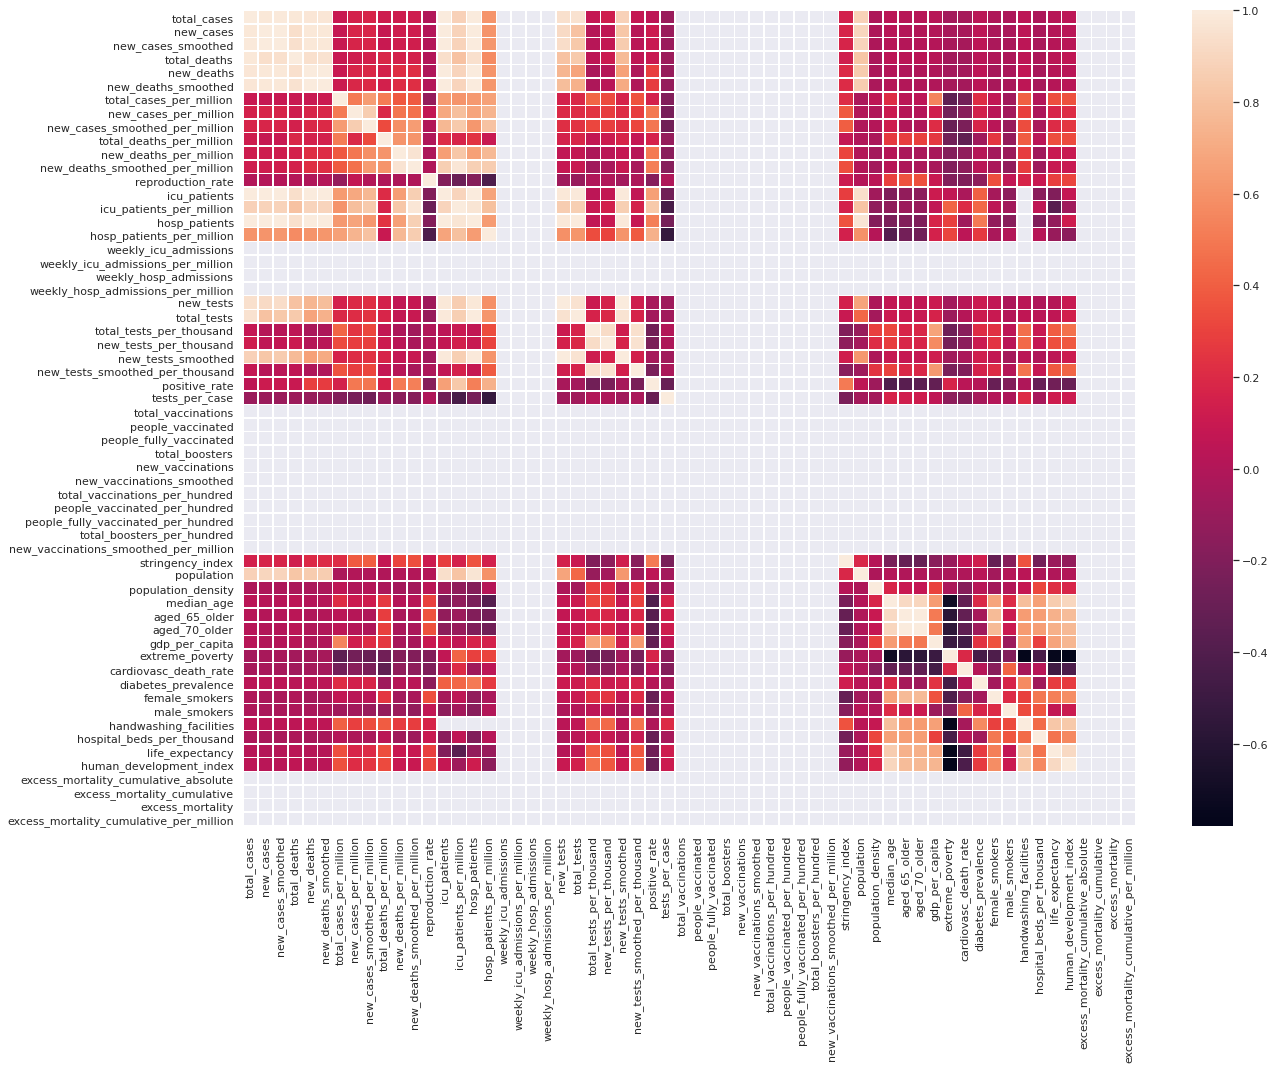

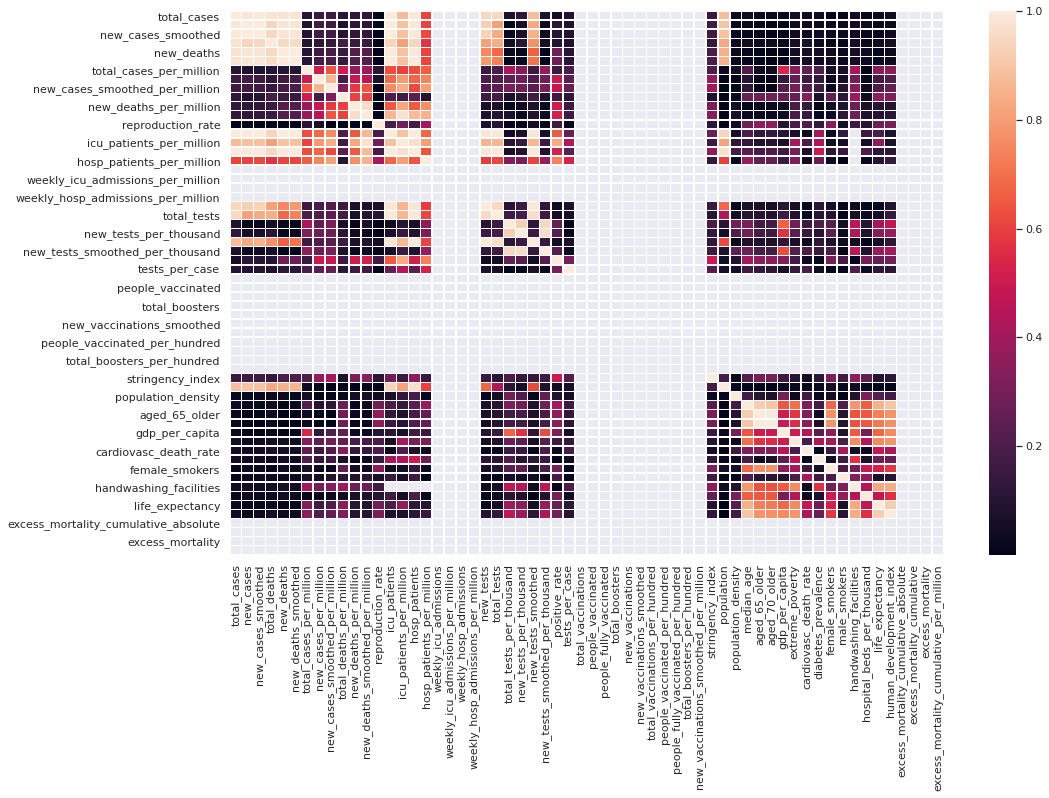

In [10]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(covid_agost.corr(), annot=False, fmt="f", linewidths=.5, ax=ax)
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(covid_agost.corr()), annot=False, fmt="f", linewidths=.5, ax=ax)

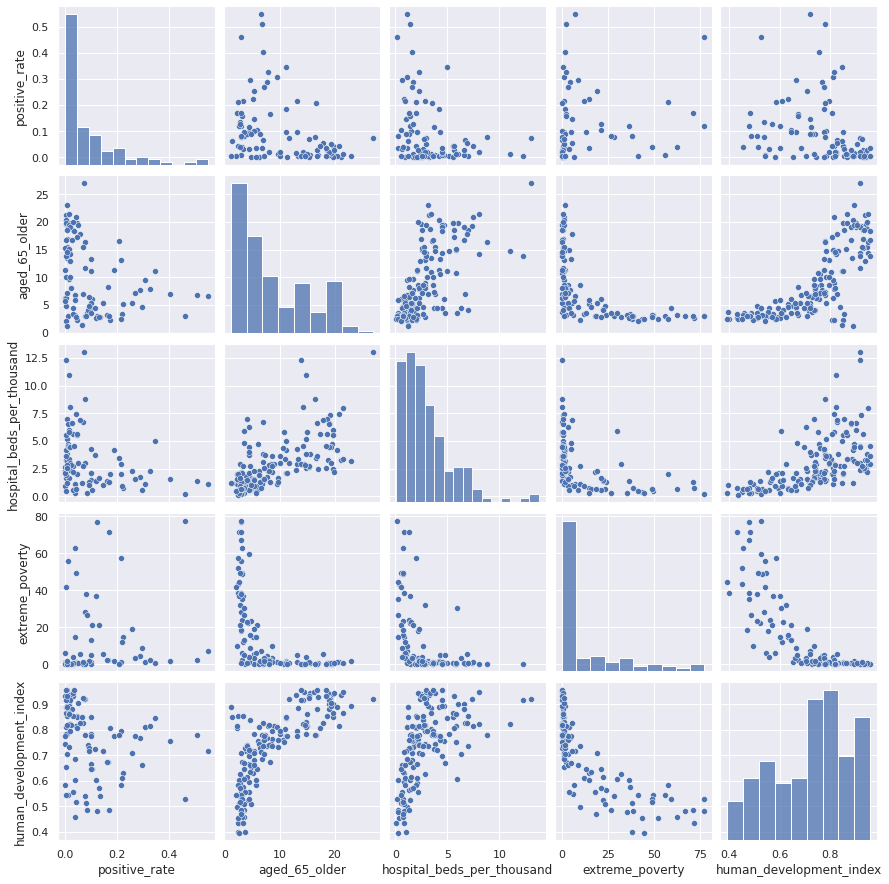

In [11]:
selected_columns = ["positive_rate", "aged_65_older", "hospital_beds_per_thousand", "extreme_poverty", "human_development_index"]
sns.pairplot(covid_agost[selected_columns])


A continuació, teniu unes funcions que de ben segur haurieu de completar per tal de poder respondre a les preguntes. Podeu implementar-les vosaltres mateixos i llavors comparar-les amb funcions de sklearn (si existeixen) 

In [12]:
def mostra_correlacions(data):
    # TODO mostra les correlacions entre els atributs 
    pass

def normalitzador_de_dades(data):
    # TODO aplica algun tipus de normalitzador als atributs
    return data

def separar_train_test(data, target, ratio=0.8):
    # TODO retorna les dades en dos subconjunts diferents amb un ratio de 'ratio'
    data_train = data
    data_val = []
    target_train = target
    target_val = []
    return data_train, data_val, target_train, target_val 

def aplicar_regressor_lineal(data, target):
    prediccions = []
    # TODO aplica un regressor lineal amb les dades per predir el target
    return prediccions


def calcula_metrica_error(prediccions, target, tipus):
    # TODO utilitza varies metriques segons la var "tipus" que analitzin les prediccions
    if tipus == "mse":
        return 0
    elif tipus == "r2":
        return 0
    else:
        print ("Metrica {} no reconeguda".format(tipus))
        return -1



## A. Exploració de la base de dades (20%)

En aquest apartat aprendrem a analitzar les dades de la base de dades. Les següents funcions ens poden anar bé:

* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Podeu veure algunes idees de 
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction

Descripció dels camps:
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv



### Preguntes a respondre
1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.
2. Com són les caracteristiques?
3. Hi tenim totes les dades (quin % de dades tenim). Neteja les dades que puguin usar-se per aprendre.
4. Quin tipus de atributs tenim a la base de dades. Neteja les dades que ens siguin útils.
5. Mostra els atributs més rellevants. (llista de parelles d'atributs ordenada per correlació)
6. Quins atributs están més correlacionats. Mostra'ls.
7. Mostra (almenys) 3 tipus diferents de gràfiques sobre les dades.
8. Els valors es troben tots a la mateixa escala? Ens importa?
9. Quins atributs tenen una distribució Guassiana?
10. Quin és l'atribut objectiu? Per què?


## B. Ús de regressor Lineal (40%)


Funcions a tenir en compte

* [data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

* [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

* [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

* [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)



### Preguntes a respondre
0. Separa el cjt d'aprenentatge i el de test. Els errors sempre seran sobre el de test.
1. Aprén un Regressor Lineal amb totes les característiques. Quins son els atributs més rellevants per a la regressió?
2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls. Estan relacionats amb la resposta anterior?
3. És millor o pitjor que utilitzant totes les dades? Per què?
4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?
5. Què passa si normalitzes les dades? El error és més baix? 
6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?
7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)
8. Compara el resultat del punt 1 amb el descens del gradient, en error i temps d'entrenament.


## C. Demostració d'assoliment (A+B en una nova BBDD) (20%)

La puntuació d'aquesta secció dependrà de la originalitat, i el treball realizat l'analisis i procesat d'una base de dades alternativa de lliure elecció. Recordeu que podeu reaprofitar la majoria del codi si ho heu implementat en funcions.


## D. Implementació Regressor Lineal (20%)

En aquest exercici, es tracta d'implementar en python el procés de descens del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(\theta) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; \theta) - y^{i})^2 + \lambda\sum_{j=1}^{n}(\theta_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$\theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot 1$$
$$\theta_j = \theta_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}\theta_{j} \right]$$


ó:

$$\theta_{j} := \theta_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; \theta)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $\theta_0$ i $\theta_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="https://miro.medium.com/max/810/1*UUHvSixG7rX2EfNFTtqBDA.gif">

Per a la implementació us podeu basar en el següent esquelet:

In [13]:
class Regressor(object):
    def __init__(self, w0, w1, alpha):
        # Inicialitzem w0 i w1 
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        pass
    
    def __update(self, x, y):
        # actualitzar aqui els pesos donada la x i la y real.
        # h = fer prediccio(x)
        
        # calcular gradient w0
        # calcular gradient w1
        
        # actualitzar w0 amb alpha
        # actualitzar w1 amd alpha
        
        # retornar el error
        return 0
    
    def fit(self, x, y, max_iter=1000, epsilon=1e-3):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        pass

Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? 
2. Quins valors de learning rate convergeixen més ràpid a la solució òptima? 
3. Com influeix la inicialització del model en el resultat final? 
4. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?
5. Evalueu mètriques de execució




## (Extra) Implementació Regresor polinomial (+10%, max: 10pts)
1. Quins parametres heu de cambiar al vostre Regressor per tal de poder predir amb funcions polinomials?
2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?
3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?
4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 
